In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import numpy as np

import explore 
import prepare  
import acquire  
import model as m

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# imports for modeling
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm # for colormap tools
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns
from mergedeep import merge

plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
from prepare import basic_clean, tokenize, stem, lemmatize, remove_stopwords, remove_urls, remove_unicode_text

In [3]:
from prepare import prepare_nlp_data

In [4]:
from scipy import stats

In [5]:
#Acquire the URLS for the Repositories to explore

headers = acquire.headers
endpoint = "https://api.github.com/search/repositories"
query = "customer in:name"
sort = "stars"
per_page = 100
order = "desc"
page = 1

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload = response.json()
#payload['items']

In [6]:
page = 2

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload2 = response.json()
merge(payload, payload2)
payload['items']

[{'id': 178226060,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNzgyMjYwNjA=',
  'name': 'E-commerce-Customer-service-robot',
  'full_name': 'gongdelu/E-commerce-Customer-service-robot',
  'private': False,
  'owner': {'login': 'gongdelu',
   'id': 37997947,
   'node_id': 'MDQ6VXNlcjM3OTk3OTQ3',
   'avatar_url': 'https://avatars.githubusercontent.com/u/37997947?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gongdelu',
   'html_url': 'https://github.com/gongdelu',
   'followers_url': 'https://api.github.com/users/gongdelu/followers',
   'following_url': 'https://api.github.com/users/gongdelu/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gongdelu/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/gongdelu/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/gongdelu/subscriptions',
   'organizations_url': 'https://api.github.com/users/gongdelu/orgs',
   'repos_url': 'https://api.github.com/users/gongdelu/repos',


In [7]:
page = 3

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload2 = response.json()
merge(payload, payload2)
payload['items']

[{'id': 118996371,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTg5OTYzNzE=',
  'name': 'CustomerChurn',
  'full_name': 'smit5490/CustomerChurn',
  'private': False,
  'owner': {'login': 'smit5490',
   'id': 13723626,
   'node_id': 'MDQ6VXNlcjEzNzIzNjI2',
   'avatar_url': 'https://avatars.githubusercontent.com/u/13723626?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/smit5490',
   'html_url': 'https://github.com/smit5490',
   'followers_url': 'https://api.github.com/users/smit5490/followers',
   'following_url': 'https://api.github.com/users/smit5490/following{/other_user}',
   'gists_url': 'https://api.github.com/users/smit5490/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/smit5490/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/smit5490/subscriptions',
   'organizations_url': 'https://api.github.com/users/smit5490/orgs',
   'repos_url': 'https://api.github.com/users/smit5490/repos',
   'events_url': 'https://api.github.com

In [8]:
#Convert the reponse to a data frame
urls_df = pd.DataFrame(payload['items'])

In [9]:
#Check the shape of the dataframe
urls_df.shape

(100, 79)

In [10]:
urls_df

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,allow_forking,is_template,topics,visibility,forks,open_issues,watchers,default_branch,permissions,score
0,118996371,MDEwOlJlcG9zaXRvcnkxMTg5OTYzNzE=,CustomerChurn,smit5490/CustomerChurn,False,"{'login': 'smit5490', 'id': 13723626, 'node_id...",https://github.com/smit5490/CustomerChurn,None,False,https://api.github.com/repos/smit5490/Customer...,...,True,False,[],public,8,4,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
1,58745539,MDEwOlJlcG9zaXRvcnk1ODc0NTUzOQ==,vc-module-customer,VirtoCommerce/vc-module-customer,False,"{'login': 'VirtoCommerce', 'id': 5762443, 'nod...",https://github.com/VirtoCommerce/vc-module-cus...,Contacts management module,False,https://api.github.com/repos/VirtoCommerce/vc-...,...,True,False,[],public,21,15,10,dev,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
2,62332503,MDEwOlJlcG9zaXRvcnk2MjMzMjUwMw==,customer_portal,SonarSoftware/customer_portal,False,"{'login': 'SonarSoftware', 'id': 12124408, 'no...",https://github.com/SonarSoftware/customer_portal,A customer portal for Sonar.,False,https://api.github.com/repos/SonarSoftware/cus...,...,True,False,[],public,15,1,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
3,85580569,MDEwOlJlcG9zaXRvcnk4NTU4MDU2OQ==,customer-portal,oroinc/customer-portal,False,"{'login': 'oroinc', 'id': 4165718, 'node_id': ...",https://github.com/oroinc/customer-portal,OroCommerce package with customer portal and n...,False,https://api.github.com/repos/oroinc/customer-p...,...,True,False,[],public,15,5,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
4,47967191,MDEwOlJlcG9zaXRvcnk0Nzk2NzE5MQ==,customer-scripts,microsoft/customer-scripts,False,"{'login': 'microsoft', 'id': 6154722, 'node_id...",https://github.com/microsoft/customer-scripts,Repository of scripts provided frequently to o...,False,https://api.github.com/repos/microsoft/custome...,...,True,False,[],public,13,1,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,69983058,MDEwOlJlcG9zaXRvcnk2OTk4MzA1OA==,ruby-sms-customer-engagement,Nexmo/ruby-sms-customer-engagement,False,"{'login': 'Nexmo', 'id': 551057, 'node_id': 'M...",https://github.com/Nexmo/ruby-sms-customer-eng...,Two-way SMS for customer engagement with Ruby,False,https://api.github.com/repos/Nexmo/ruby-sms-cu...,...,True,False,[tutorial],public,3,0,7,main,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
96,102245898,MDEwOlJlcG9zaXRvcnkxMDIyNDU4OTg=,Clustering-Analysis-on-customers-of-a-wholesal...,prakhardogra921/Clustering-Analysis-on-custome...,False,"{'login': 'prakhardogra921', 'id': 6964449, 'n...",https://github.com/prakhardogra921/Clustering-...,Project in which unsupervised learning techniq...,False,https://api.github.com/repos/prakhardogra921/C...,...,True,False,[],public,6,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
97,181278845,MDEwOlJlcG9zaXRvcnkxODEyNzg4NDU=,Kaggle_santander-customer-transaction-prediction,Rajneesh-Tiwari/Kaggle_santander-customer-tran...,False,"{'login': 'Rajneesh-Tiwari', 'id': 16912628, '...",https://github.com/Rajneesh-Tiwari/Kaggle_sant...,Code for 118th position in Kaggle santander-cu...,False,https://api.github.com/repos/Rajneesh-Tiwari/K...,...,True,False,[],public,3,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
98,149399792,MDEwOlJlcG9zaXRvcnkxNDkzOTk3OTI=,Exploratory-Data-Analysis-Customer-Churn-Predi...,Shubha23/Exploratory-Data-Analysis-Customer-Ch...,False,"{'login': 'Shubha23', 'id': 17091320, 'node_id...",https://github.com/Shubha23/Exploratory-Data-A...,Application of K-means clustering. Prediction ...,False,https://api.github.com/repos/Shubha23/Explorat...,...,True,False,[],public,3,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0


In [11]:
#Get a list of the full_name for the urls. Saved to acquire seperate file as repos and assigned to a variable
urls_df.full_name.to_list()

['smit5490/CustomerChurn',
 'VirtoCommerce/vc-module-customer',
 'SonarSoftware/customer_portal',
 'oroinc/customer-portal',
 'microsoft/customer-scripts',
 'correooke/example-customers-app',
 'darkdreamingdan/mlnd-customer-segments',
 'emilybache/CustomerSync-Refactoring-Kata',
 'devmentors/Pacco.Services.Customers',
 'bestkao/customer_segments',
 'toshi-k/kaggle-santander-customer-satisfaction',
 'cometchat-pro-tutorials/react-customer-support-live-widget',
 'celestinhermez/sparkify_customer_churn',
 'Ifihan/customer-management-app',
 'skioo/django-customer-billing',
 'anqi666/Customer-Data-Analysis',
 'mutedblues/Customer-Success-Management',
 'ho-nl/magento1-Ho_Customer',
 'eventuate-examples/eventuate-micronaut-examples-customers-and-orders',
 'aryashah2k/Datalogy-Customer-Segmentation-Data-Science-Internship',
 'Horizon733/customer-care-chatbot',
 'dserradji/reactive-customer-service',
 'Ashniu123/nestjs-customer-order-eventsourcing-cqrs',
 'M-R-K-Development/bc-customer-plugin',

In [12]:
#Use the scrape github function from the acquire module to acquire the dataframe containing the names of the
#repositories and the contents of the readme files
df = acquire.scrape_github_data()

#convert the data into a dataframe
df = pd.DataFrame(df)
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [13]:
# read in the json file generated by compiling the acquire.py file
df = pd.read_json('data2.json')

In [14]:
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [15]:
len(df)

200

In [16]:
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [17]:
# do drop unneeded data first then prep
df = prepare.drop_unneeded_data(df)

In [18]:
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...


In [19]:
df = prepare_nlp_data(df, content = 'readme_contents')

In [20]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See,customer analytics ipython notebook see,custom analyt ipython notebook see,customer analytics ipython notebook see
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...


## Explore

### What are the most common words in READme files?

In [21]:
words = ' '.join(df.stemmed)

In [22]:
words[0:1500]

'ecommercecustomerservicerobot seqseqgrugruteach forc torch jieba numpi custom analyt ipython notebook see warn bewar repositori deprec maintain evolv syliu team still use compat syliu version risk bug fix custom order cancel plugin plugin allow custom cancel place order process screenshot show custom order page cancel buttonsdocsscreenshot png busi valu far custom chang mind alreadi place order administr cancel order howev ask question cant custom cancel order yet paid come custom order cancel plugin allow cancel unpaid order straight order histori view instal bewar instal instruct assum your use symfoni flex dont take look legaci instal instructiondocslegacyinstal md howev strongli encourag use symfoni flex much quicker instal plugin requir compos bash compos requir syliuscustomerordercancellationplugin rememb allow commun recip compos config extra symfoni allowcontrib true plugin instal process extens point custom order cancel plugin use order entiti deriv syliuscorebundl well alrea

In [23]:
frequencies = pd.Series(words.split()).value_counts()

In [24]:
frequencies.head(50)

custom      923
data        424
use         407
model       258
creat       209
instal      169
project     151
run         150
file        150
featur      147
new         144
notebook    136
account     133
magento     128
set         127
segment     115
png         110
valu        107
churn       106
code        106
select      105
follow      103
product     103
predict     102
click       101
servic       95
login        94
one          93
market       92
need         91
compani      90
deploy       90
email        90
requir       89
inform       89
page         89
provid       89
test         89
name         88
approv       87
view         86
time         85
function     85
get          82
also         82
add          81
applic       80
api          80
learn        79
admin        79
dtype: int64

In [25]:
top_20_words = frequencies.head(20)

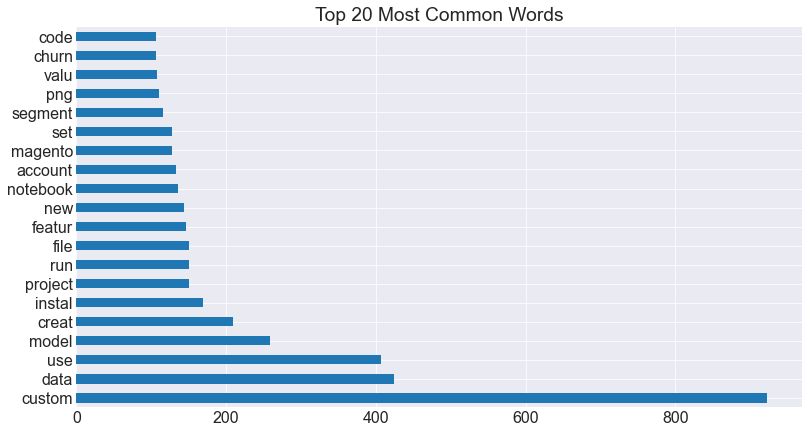

In [26]:
top_20_words.plot.barh()
title = plt.title('Top 20 Most Common Words')

In [27]:
from wordcloud import WordCloud

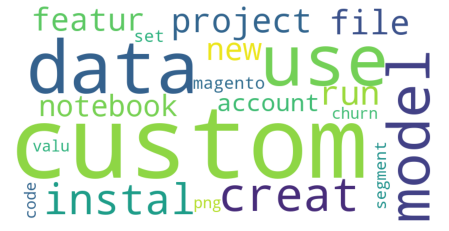

In [28]:
data = {k: v for k, v in top_20_words.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Does the length of the README vary by programming language?

In [29]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See,customer analytics ipython notebook see,custom analyt ipython notebook see,customer analytics ipython notebook see
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...


In [30]:
length_readme = []
for i in range(len(df)):
    length_readme.append(len(df.readme_contents[i]))

In [31]:
length_readme_df = pd.DataFrame(length_readme)

In [32]:
df = pd.concat([df, length_readme_df], axis = 1)

In [33]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,0
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,83
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See,customer analytics ipython notebook see,custom analyt ipython notebook see,customer analytics ipython notebook see,40
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,1901
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,255
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2764


In [34]:
df.rename(columns = {0: "length"}, inplace = True)

In [35]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,83
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See,customer analytics ipython notebook see,custom analyt ipython notebook see,customer analytics ipython notebook see,40
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,1901
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,255
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2764


In [36]:
df.language.value_counts()

Jupyter Notebook    49
PHP                 38
Python              25
JavaScript          24
Name: language, dtype: int64

In [37]:
jupyter = df[df.language == "Jupyter Notebook"]
php = df[df.language == "PHP"]
python = df[df.language == "Python"]
java = df[df.language == "JavaScript"]

In [38]:
php.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,1901
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2764
7,php-cuong/magento2-customer-avatar,PHP,Magento Customer Avatar This is an awesome m...,magento customer avatar awesome module allows ...,magento custom avatar awesom modul allow custo...,magento customer avatar awesome module allows ...,1247
8,printu/customerio,PHP,Customer io API Client PHP bindings for the C...,customer io api client php bindings customer i...,custom io api client php bind custom io api ap...,customer io api client php binding customer io...,2883
10,kiwicommerce/magento2-login-as-customer,PHP,Were not maintaining this extension if you ne...,maintaining extension need support please cont...,maintain extens need support pleas contact us ...,maintaining extension need support please cont...,2748


In [39]:
jupyter = jupyter.reset_index()
php = php.reset_index()
python = python.reset_index()
java = java.reset_index()

In [40]:
dataframes = [jupyter, php, python, java]
for lang in dataframes:
    print(lang.language[0])
    print("Median READme length", lang.length.median())
    print("Mean READme length", lang.length.mean())
    print(" ")

Jupyter Notebook
Median READme length 1644.0
Mean READme length 3242.938775510204
 
PHP
Median READme length 746.5
Mean READme length 1439.4736842105262
 
Python
Median READme length 644.0
Mean READme length 1579.96
 
JavaScript
Median READme length 1107.5
Mean READme length 2354.375
 


In [41]:
not_jupyter = [php, python, java]
for lang in not_jupyter:
    print(lang.language[0], "average READme length vs Jupyter average length")
    print(stats.ttest_ind(lang.length, jupyter.length))
    print(" ")

PHP average READme length vs Jupyter average length
Ttest_indResult(statistic=-1.8616184902205477, pvalue=0.06611305850967955)
 
Python average READme length vs Jupyter average length
Ttest_indResult(statistic=-1.3835831902700682, pvalue=0.17076087452026897)
 
JavaScript average READme length vs Jupyter average length
Ttest_indResult(statistic=-0.7091768908777644, pvalue=0.4805370466090102)
 


In [42]:
not_php = [python, java]
for lang in not_php:
    print(lang.language[0], "average READme length vs PHP average length")
    print(stats.ttest_ind(lang.length, php.length))
    print(" ")

Python average READme length vs PHP average length
Ttest_indResult(statistic=0.22927542200610088, pvalue=0.8194218622696456)
 
JavaScript average READme length vs PHP average length
Ttest_indResult(statistic=1.3276887891704021, pvalue=0.18931025885020386)
 


In [43]:
print("Python average READme length vs Java average length")
print(stats.ttest_ind(python.length, java.length))

Python average READme length vs Java average length
Ttest_indResult(statistic=-0.8921389809818724, pvalue=0.3768633998634675)


None of the average READme lengths are significantly different from one another.

In [44]:
for lang in dataframes:
    print(lang.language[0], "READme length vs all languages READme lengths")
    print(stats.ttest_1samp(lang.length, df.length.mean()))
    print(" ")

Jupyter Notebook READme length vs all languages READme lengths
Ttest_1sampResult(statistic=1.193575271661778, pvalue=0.23851004226093867)
 
PHP READme length vs all languages READme lengths
Ttest_1sampResult(statistic=-2.4404955964402517, pvalue=0.019575195371731947)
 
Python READme length vs all languages READme lengths
Ttest_1sampResult(statistic=-1.271917776615204, pvalue=0.21558940036119228)
 
JavaScript READme length vs all languages READme lengths
Ttest_1sampResult(statistic=0.11482863002003657, pvalue=0.9095775400216792)
 


None of the language READme lengths differ significantly from the population READme lengths.

### Do different programming languages use a different number of unique words?

In [45]:
jupyter_words = ' '.join(jupyter.stemmed)

In [46]:
jupyter_unique_words = len(set(re.findall('\w+', jupyter_words)))

In [47]:
jupyter_unique_words

2630

In [48]:
php_words = ' '.join(php.stemmed)

In [49]:
php_unique_words = len(set(re.findall('\w+', php_words)))

In [50]:
php_unique_words

1106

In [51]:
python_words = ' '.join(python.stemmed)

In [52]:
python_unique_words = len(set(re.findall('\w+', python_words)))

In [53]:
python_unique_words

1291

In [54]:
java_words = ' '.join(java.stemmed)

In [55]:
java_unique_words = len(set(re.findall('\w+', java_words)))

In [56]:
java_unique_words

1395

In [57]:
all_words_unique = []
for i in range(len(df)):
    all_words_unique.append(len(set(re.findall('\w+', df.stemmed[i]))))

In [58]:
words_unique_df = pd.DataFrame(all_words_unique)

In [59]:
df = pd.concat([df, words_unique_df], axis = 1)

In [60]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length,0
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,83,6
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See,customer analytics ipython notebook see,custom analyt ipython notebook see,customer analytics ipython notebook see,40,5
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,1901,107
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,255,23
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2764,143


In [61]:
df.rename(columns = {0: "unique_words"}, inplace = True)

In [62]:
jupyter = df[df.language == "Jupyter Notebook"]
php = df[df.language == "PHP"]
python = df[df.language == "Python"]
java = df[df.language == "JavaScript"]

In [63]:
jupyter = jupyter.reset_index()
php = php.reset_index()
python = python.reset_index()
java = java.reset_index()

In [64]:
not_jupyter = [php, python, java]
for lang in not_jupyter:
    print(lang.language[0], "average unique words vs Jupyter average unique words")
    print(stats.ttest_ind(lang.unique_words, jupyter.unique_words))
    print(" ")

PHP average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-2.433140313673896, pvalue=0.017064510499042333)
 
Python average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-1.6128187626187684, pvalue=0.11115882462933681)
 
JavaScript average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-0.7889065178819505, pvalue=0.43279310141216065)
 


In [65]:
not_php = [python, java]
for lang in not_php:
    print(lang.language[0], "average unique words vs PHP average unique words")
    print(stats.ttest_ind(lang.unique_words, php.unique_words))
    print(" ")

Python average unique words vs PHP average unique words
Ttest_indResult(statistic=0.4580777078010558, pvalue=0.6485243059897029)
 
JavaScript average unique words vs PHP average unique words
Ttest_indResult(statistic=1.8137204264009048, pvalue=0.07472229430094941)
 


In [66]:
print("Python average unique words vs Java average unique words")
print(stats.ttest_ind(python.unique_words, java.unique_words))

Python average unique words vs Java average unique words
Ttest_indResult(statistic=-0.9490050476017465, pvalue=0.34747246057657355)


- Javascript unique words differs significantly from PHP.
- Jupyter Notebook differs significantly from PHP.

In [67]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length,unique_words
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,EcommerceCustomerservicerobot SeqSeqGRUGRU...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,ecommercecustomerservicerobot seqseqgrugruteac...,83,6
1,kpei/Customer-Analytics,Jupyter Notebook,Customer Analytics iPython Notebook See,customer analytics ipython notebook see,custom analyt ipython notebook see,customer analytics ipython notebook see,40,5
2,Sylius/CustomerOrderCancellationPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,1901,107
3,optiflow/rfm-customer-segmentation,Jupyter Notebook,Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,255,23
4,Sylius/CustomerReorderPlugin,PHP,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2764,143


In [68]:
dataframes = [jupyter, php, python, java]

In [69]:
for lang in dataframes:
    print(lang.language[0], "unique words vs all languages unique words")
    print(stats.ttest_1samp(lang.unique_words, df.unique_words.mean()))
    print(" ")

Jupyter Notebook unique words vs all languages unique words
Ttest_1sampResult(statistic=1.4898071344052946, pvalue=0.14281701172334046)
 
PHP unique words vs all languages unique words
Ttest_1sampResult(statistic=-3.4211473401817645, pvalue=0.0015350607370688137)
 
Python unique words vs all languages unique words
Ttest_1sampResult(statistic=-1.1020450367274606, pvalue=0.28137148824009134)
 
JavaScript unique words vs all languages unique words
Ttest_1sampResult(statistic=0.25732548982471065, pvalue=0.799215716548088)
 


In [70]:
def word_cloud(word_string, name):
    from wordcloud import WordCloud
    img = WordCloud(background_color='white', width=800, height=600).generate(word_string)
    print('-------------------')
    print(f'{name}')
    print('-------------------')
    plt.imshow(img)
    plt.axis('off')
    
    
def df_to_wordcloud(df, language = None):
    if language: 
        df = df[df.language_cleaned == language]
    else:
        language = 'all_language'
    to_list = ''
    for readme in df.readme_contents_cleaned:
        to_list += readme
    word_cloud(to_list,language)

Only PHP has significantly different unique word from the population.

In [71]:
train, validate, test = prepare.split_data(df)

train---> (75, 8)
validate---> (33, 8)
test---> (28, 8)


In [72]:
all_word_counts = explore.get_word_counts_series(train, 'lemmatized')
java_word_counts = explore.get_word_counts_series(train[train.language == 'Java'], 'lemmatized')
javascript_word_counts = explore.get_word_counts_series(train[train.language == 'JavaScript'], 'lemmatized')
php_word_counts = explore.get_word_counts_series(train[train.language == 'PHP'], 'lemmatized')
jupyter_word_counts = explore.get_word_counts_series(train[train.language == 'Jupyter Notebook'], 'lemmatized')

In [73]:
all_word_counts[all_word_counts.index == 'customer']

customer    476
dtype: int64

In [74]:
word_counts_list = [java_word_counts, javascript_word_counts, php_word_counts, jupyter_word_counts, all_word_counts]
column_names = list(df.language.unique())
column_names.append('all')

languages = list(df.language.unique())

In [75]:
word_counts = pd.concat(word_counts_list, axis=1).fillna(0).astype(int)
word_counts.columns = column_names
word_counts.head()

,Jupyter Notebook,PHP,Python,JavaScript,all
aa,0,0,0,2,2
abandoned,0,0,1,0,1
ability,0,0,1,1,2
able,0,0,3,7,10
abrir,0,0,0,0,2


In [76]:
def plot_overlap_stacked_bar(word_counts, category, num_top = 20, cmap = None):
    '''
    This function takes in word_counts df
        - Must have counts for each category as well as a category named 'all'
    category you want to sort by (aka top 20 words in java readmes)
    num_top is how many words you want to see the proportion of, default = 20
    Default colors are tab10 but you can customize that
    
    for cmap use 'viridis'
    
    '''
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=16)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all', ascending=False)
     .head(num_top)
     .apply(lambda row: row / row['all'], axis=1)
     .drop(columns='all')
     .sort_values(by=category)
     .plot.barh(stacked=True, width=1, ec='lightgrey', cmap = cmap, alpha = 1))
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.title(f'% of most common {num_top} {category} Readme Words\n')
    plt.xlabel('\nProportion of Overlap')
    # make tick lables display as percentages!! 
    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    
    plt.show()

<Figure size 1152x648 with 0 Axes>

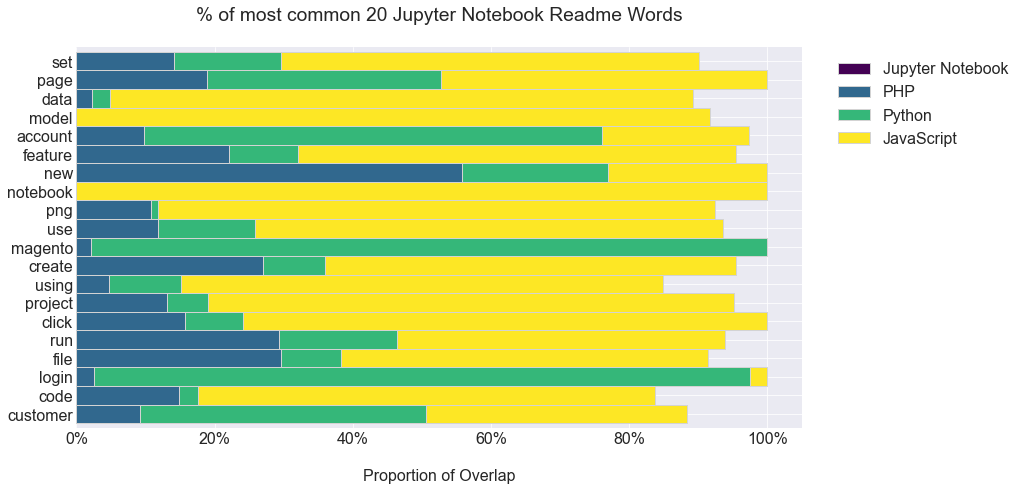

<Figure size 1152x648 with 0 Axes>

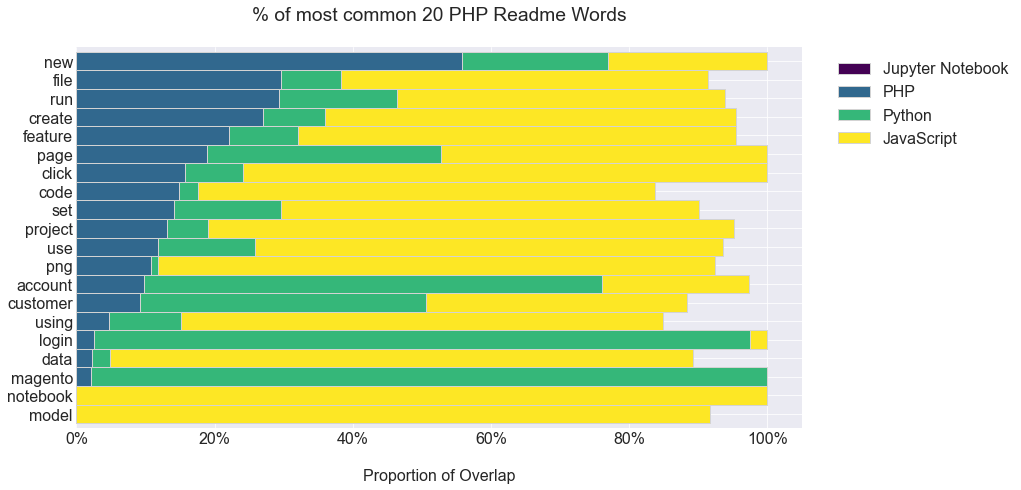

<Figure size 1152x648 with 0 Axes>

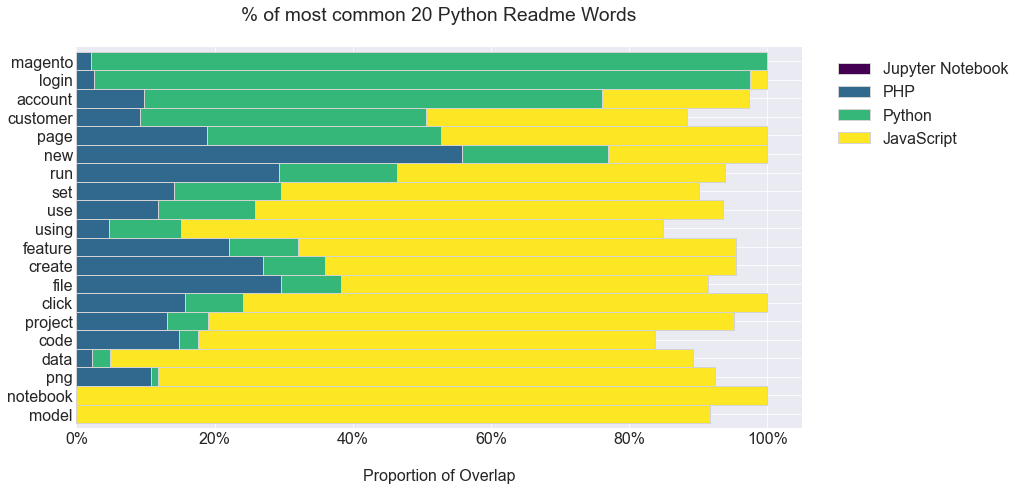

<Figure size 1152x648 with 0 Axes>

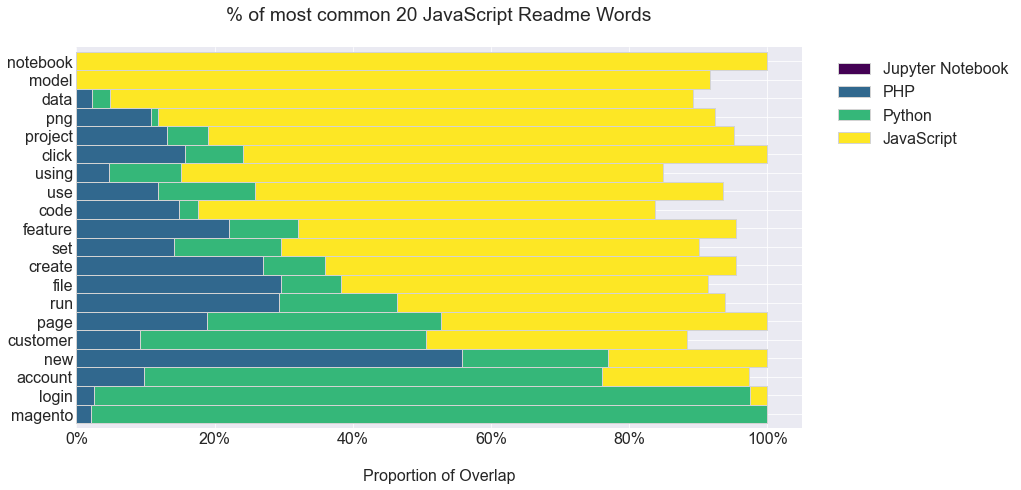

In [77]:
for language in languages:
    plot_overlap_stacked_bar(word_counts, language, cmap = 'viridis')

Take aways

- magento and model were among the top 20 in each language

In [78]:
df.language.value_counts()

Jupyter Notebook    49
PHP                 38
Python              25
JavaScript          24
Name: language, dtype: int64

Modeling

In [79]:
#PHP is the baseline prediction
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')

Baseline Accuracy: 36%


## Lemmatized 

In [80]:
# create dataframe to store the scores
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

In [81]:
#TD/IDF vectorizer on the lemmatized data.

In [82]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

# split to X/y datasets 
X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [83]:
# create list of models to loop through
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression()]

# create list of model names that correspond to models
model_names = ['Naive_Bayes_tfidf_lemmatized', 'SVC_tfidf_lemmatized', 'Decision_tree_tfidf_lemmatized', 
               'Random_forest_tfidf_lemmatized', 'KNN_tfidf_lemmatized', 'Log_reg_tfidf_lemmatized']

# initialize list of names of the languages
class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [84]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [85]:
#stemmed data still using the TD/IDF vectorizer.

In [86]:
# bring in the vectorizer
tfidf = TfidfVectorizer()

X_data = tfidf.fit_transform(df.stemmed)
y_data = df.language

# split to X/y datasets 
X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [87]:
# make a list of algorithms we want to try for our models
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression()]

# name the models
model_names = ['Naive_Bayes_stemmed', 'SVC_stemmed', 'Decision_tree_stemmed', 'Random_forest_stemmed', 'KNN_bigrams_stemmed', 'Log_reg_stemmed']

# list the languages
class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [88]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [89]:
score_df

,model_name,train_score,validate_score
0,Naive_Bayes_tfidf_lemmatized,0.880000,0.575758
1,SVC_tfidf_lemmatized,0.973333,0.787879
2,Decision_tree_tfidf_lemmatized,0.973333,0.727273
3,Random_forest_tfidf_lemmatized,0.973333,0.757576
4,KNN_tfidf_lemmatized,0.933333,0.727273
5,Log_reg_tfidf_lemmatized,0.946667,0.606061
6,Naive_Bayes_stemmed,0.826667,0.575758
7,SVC_stemmed,0.973333,0.757576
8,Decision_tree_stemmed,0.973333,0.787879
9,Random_forest_stemmed,0.973333,0.818182


Takeaways

- Overall most of the models performed well
- It looks like most of the models utilizing the stemmed data are overfit
- Using the stemmed data does not give us better accuracy than the lemmatized data

Let's see how our models do with bigrams using lemmatized data.

In [90]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [91]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

model_names = ['Naive_Bayes_tfidf2', 'SVC_tfidf2', 'Decision_tree_tfidf2', 'Random_forest_tfidf2', 'KNN_bigrams_tfidf2']

class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [92]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [93]:
#using just the clean data (not lemmatized or stemmed)

In [94]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [95]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=10, weights= 'distance'),
             LogisticRegression()]

model_names = ['Naive_Bayes_tfidf_clean', 'SVC_tfidf_clean', 'Decision_tree_tfidf_clean', 'Random_forest_tfidf_clean', 'KNN_n10_tfidf_clean',
              'Log_reg_clean']

class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [96]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [97]:
score_df.sort_values(by = 'validate_score', ascending = False)

,model_name,train_score,validate_score
21,KNN_n10_tfidf_clean,0.973333,0.818182
9,Random_forest_stemmed,0.973333,0.818182
8,Decision_tree_stemmed,0.973333,0.787879
1,SVC_tfidf_lemmatized,0.973333,0.787879
18,SVC_tfidf_clean,0.973333,0.787879
3,Random_forest_tfidf_lemmatized,0.973333,0.757576
7,SVC_stemmed,0.973333,0.757576
2,Decision_tree_tfidf_lemmatized,0.973333,0.727273
4,KNN_tfidf_lemmatized,0.933333,0.727273
20,Random_forest_tfidf_clean,0.973333,0.727273


The top score is the KNN_n10_tfidf_clean utilizing the TD/IDf method. Let's take a deeper look at the results from that model with the Train and Validate datasets.

                   ============== Random_forest_tfidf_lemmatized ================           
RandomForestClassifier()
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

      JavaScript       1.00      0.92      0.96        13
Jupyter Notebook       1.00      1.00      1.00        27
             PHP       1.00      0.95      0.98        21
          Python       0.88      1.00      0.93        14

        accuracy                           0.97        75
       macro avg       0.97      0.97      0.97        75
    weighted avg       0.98      0.97      0.97        75



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


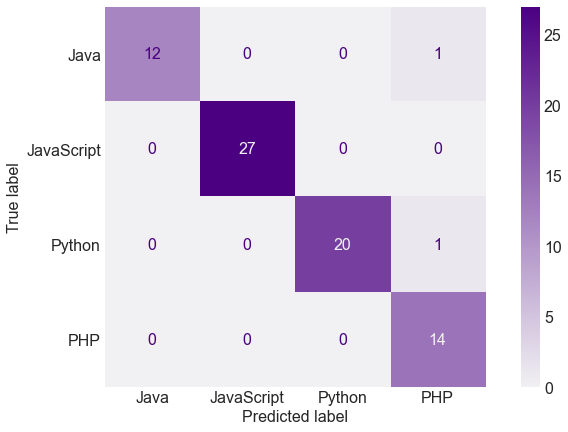


RandomForestClassifier()
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

      JavaScript       0.80      0.67      0.73         6
Jupyter Notebook       0.92      0.92      0.92        12
             PHP       0.80      0.89      0.84         9
          Python       0.83      0.83      0.83         6

        accuracy                           0.85        33
       macro avg       0.84      0.83      0.83        33
    weighted avg       0.85      0.85      0.85        33



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


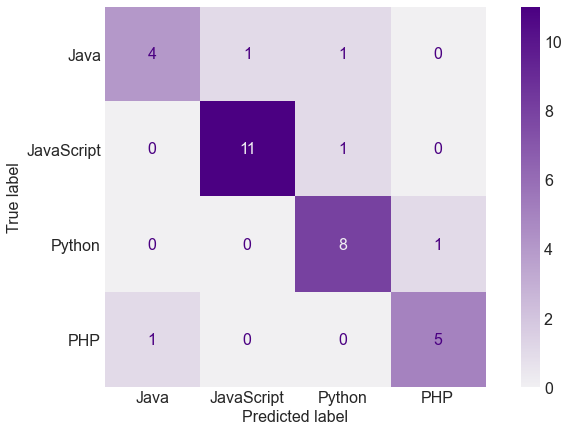


-------------------------------------------------------------------



In [98]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

m.make_models_and_print_metrics(RandomForestClassifier(), 'Random_forest_tfidf_lemmatized', X_train, y_train, X_validate, y_validate, class_names)

### Takeaways

While the model is overfit on the training data, it seems to still do well on the Validate set (79% accuracy). It might be due to the amount of readmes we are pulling from. We can take this model now to our test data to see how it performs.



In [99]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

                   ============== KNN_n10_tfidf_clean ================           
KNeighborsClassifier(n_neighbors=10, weights='distance')
~~~~~~~~Test Scores~~~~~~~~~
                  precision    recall  f1-score   support

      JavaScript       0.50      0.40      0.44         5
Jupyter Notebook       0.77      1.00      0.87        10
             PHP       0.73      1.00      0.84         8
          Python       0.00      0.00      0.00         5

        accuracy                           0.71        28
       macro avg       0.50      0.60      0.54        28
    weighted avg       0.57      0.71      0.63        28



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/si

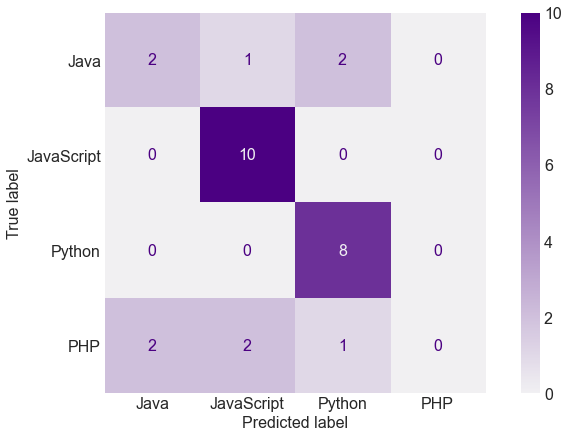


-------------------------------------------------------------------



In [100]:
# The second confusion matrix should be test

m.make_models_and_print_metrics_test_data(KNeighborsClassifier(n_neighbors=10, weights= 'distance'), 'KNN_n10_tfidf_clean', X_train, y_train, X_test, y_test, class_names)

In [101]:
# set palette
sns.set_palette('viridis_r')

# set up second dataframe for scores top 7 
score_df2 = score_df.set_index('model_name').sort_values(by = ['validate_score', 'model_name'], ascending = False).head(7)

# add the test score to the model we tested on (KNN)
score_df2['test_score']= [0.71, 0, 0, 0, 0, 0, 0]

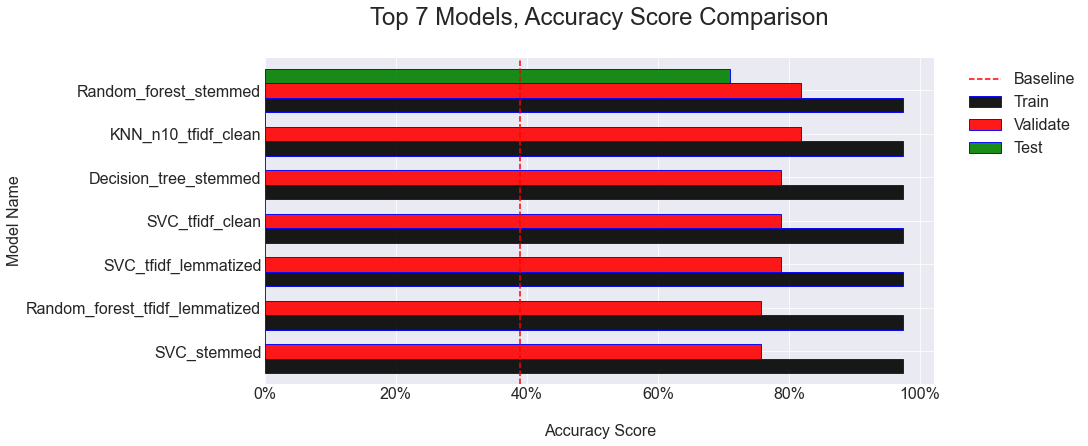

In [102]:
score_df2.sort_values(by= ['test_score', 'validate_score']).plot.barh(alpha = .9, width = 1, ec = 'blue', color=['black', 'red', 'green'],   
                                                                      figsize = (12,6))
# plot baseline
plt.axvline(x = .39, c = 'red', linestyle = '--')
plt.legend(['Baseline','Train', 'Validate','Test'], bbox_to_anchor = (1.03,1))
plt.ylabel('Model Name')
plt.xlabel('\nAccuracy Score')
# set ticks to percentages
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.title('Top 7 Models, Accuracy Score Comparison\n', fontsize = 24)

plt.show()